In [3]:
!pip install pandas
!pip install matplotlib

  Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp312-cp312-win_amd64.whl (223 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 18.0 MB/s eta 0:00:00
Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl (71 kB)
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)


  Architecture  Time_Taken_sec  Final_Avg_Score
0         Base      730.394073       231.574741
1         Deep      753.971368       237.574623
2         Tiny      786.473913       170.466390
3         Wide      657.249678       250.549894


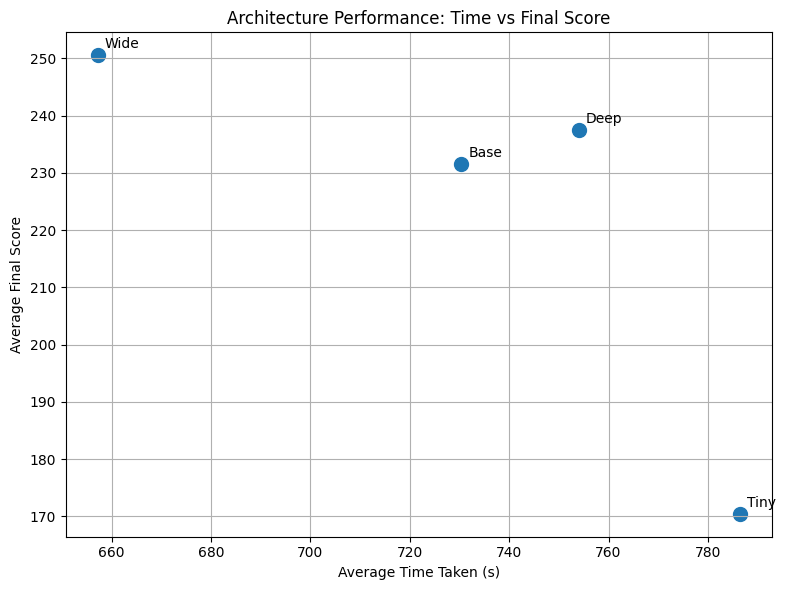

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("RQ1_results.csv", header=None, names=["Architecture_Run", "Time_Taken_sec", "Final_Avg_Score"])
df["Architecture"] = df["Architecture_Run"].apply(lambda x: x.split("_")[0])
summary = df.groupby("Architecture").agg({
    "Time_Taken_sec": "mean",
    "Final_Avg_Score": "mean"
}).reset_index()

print(summary)
plt.figure(figsize=(8,6))
plt.scatter(summary["Time_Taken_sec"], summary["Final_Avg_Score"], s=100)
for i, row in summary.iterrows():
    plt.annotate(row["Architecture"], (row["Time_Taken_sec"], row["Final_Avg_Score"]),
                 textcoords="offset points", xytext=(5,5), ha='left')

plt.xlabel("Average Time Taken (s)")
plt.ylabel("Average Final Score")
plt.title("Architecture Performance: Time vs Final Score")
plt.grid(True)
plt.tight_layout()
plt.show()
